# 3. 넘파이로 무작위 시뮬레이션 수행하기
## 3.1 넘파이로 무작위 동전 뒤집기와 주사위 던지기 시뮬레이션하기

In [1]:
# 넘파이 라이브러리 불러오기
import numpy as np

In [2]:
# 무작위로 굴린 주사위 시뮬레이션하기
die_roll = np.random.randint(1, 7)
assert 1 <= die_roll <= 6

In [3]:
# 무작위로 얻은 주사위 값을 재현 가능하도록 시드 설정하기
np.random.seed(0)
die_rolls = [np.random.randint(1, 7) for _ in range(3)]
assert die_rolls == [5, 6, 1]

In [4]:
# 공정한 동전 뒤집기 한 번 시뮬레이션하기
np.random.seed(0)
coin_flip = np.random.randint(0, 2)
print(f"동전은 {'앞면' if coin_flip == 1 else '뒷면'}으로 떨어졌습니다")

동전은 뒷면으로 떨어졌습니다


In [5]:
# 동전 뒤집기 10번 시뮬레이션하기
np.random.seed(0)
def frequency_heads(coin_flips_sequence):
    total_heads = len([head for head in coin_flips_sequence if head == 1])
    return total_heads / len(coin_flips_sequence)

coin_flips = [np.random.randint(0, 2) for _ in range(10)]
freq_heads = frequency_heads(coin_flips)
print(f"동전 앞면이 관측된 빈도는 {freq_heads}입니다")


동전 앞면이 관측된 빈도는 0.8입니다


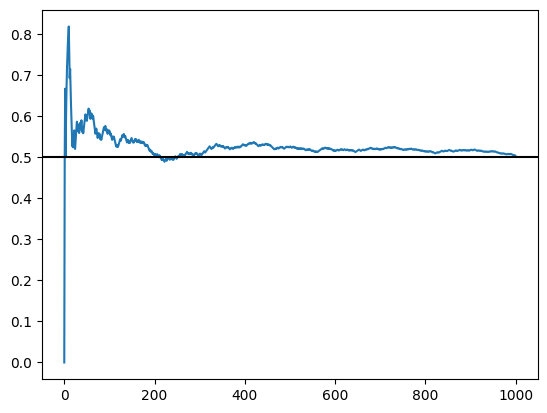

In [6]:
import matplotlib.pyplot as plt

# 일련의 공정한 동전 뒤집기 시뮬레이션 그래프
np.random.seed(0)
coin_flips = []
frequencies = []
for _ in range(1000):
    coin_flips.append(np.random.randint(0, 2))
    frequencies.append(frequency_heads(coin_flips))

plt.plot(list(range(1000)), frequencies)
plt.axhline(0.5, color='k')


In [7]:
# 편향된 동전 뒤집기 시뮬레이션하기
np.random.seed(0)
print("동전을 한 번 뒤집어 봅니다")
coin_flip = np.random.binomial(1, 0.7)
print(f"편향된 동전은 {'앞면' if coin_flip == 1 else '뒷면'}으로 떨어졌습니다")

print("\n동전을 10번 뒤집어 봅니다")
number_coin_flips = 10
head_count = np.random.binomial(number_coin_flips, 0.7)
print((f"{number_coin_flips}번의 편향된 동전 뒤집기 중 앞면은"
       f"{head_count}번 관측되었습니다"))

동전을 한 번 뒤집어 봅니다
편향된 동전은 앞면으로 떨어졌습니다

동전을 10번 뒤집어 봅니다
10번의 편향된 동전 뒤집기 중 앞면은6번 관측되었습니다


In [8]:
# 동전 뒤집기 빈도의 수렴 정도 계산하기
np.random.seed(0)
head_count = np.random.binomial(1000, 0.7)
frequency = head_count / 1000
print(f"동전 앞면이 관측된 빈도는 {frequency}입니다")

동전 앞면이 관측된 빈도는 0.697입니다


In [9]:
# 동전 뒤집기 빈도의 수렴 정도 재계산하기
np.random.seed(0)
assert np.random.binomial(1000, 0.7) / 1000 == 0.697
for i in range(1,6):
    head_count = np.random.binomial(1000, 0.7)
    frequency = head_count / 1000
    print(f"{i}번째 반복에서의 빈도는 {frequency}입니다")
    if frequency == 0.7:
        print("빈도와 실제 확률이 일치합니다!")

1번째 반복에서의 빈도는 0.69입니다
2번째 반복에서의 빈도는 0.7입니다
빈도와 실제 확률이 일치합니다!
3번째 반복에서의 빈도는 0.707입니다
4번째 반복에서의 빈도는 0.702입니다
5번째 반복에서의 빈도는 0.699입니다


## 3.2 히스토그램 넘파이 배열로 계산하는 신뢰 구간

In [10]:
# 동전 뒤집기 샘플링 1000번을 500번 수행한 빈도 계산하기
np.random.seed(0)
head_count_list = [np.random.binomial(1000, 0.7) for _ in range(500)]

In [11]:
# 동전 뒤집기 빈도 계산 최적화하기
np.random.seed(0)
head_count_array = np.random.binomial(1000, 0.7, 500)

In [12]:
# 넘파이 배열을 파이썬 리스트로 변환하기
assert head_count_array.tolist() == head_count_list

In [13]:
# 파이썬 리스트를 넘파이 배열로 변환하기
new_array = np.array(head_count_list)
assert np.array_equal(new_array, head_count_array) == True

In [14]:
# 넘파이로 빈도 계산하기
frequency_array = head_count_array / 1000
assert frequency_array.tolist() == [head_count / 1000 for head_count in head_count_list]
assert frequency_array.tolist() == list(map(lambda x: x / 1000, head_count_list))


In [15]:
# 빈도를 담은 넘파이 배열 출력하기
print(frequency_array[:20])

[0.697 0.69  0.7   0.707 0.702 0.699 0.723 0.67  0.702 0.713 0.721 0.689
 0.711 0.697 0.717 0.691 0.731 0.697 0.722 0.728]


In [16]:
# 최대 및 최소 빈도 값 찾기
min_freq = frequency_array.min()
max_freq = frequency_array.max()
print(f"관측된 최소 빈도: {min_freq}")
print(f"관측된 최대 빈도: {max_freq}")
print(f"빈도의 범위: {max_freq - min_freq}")


관측된 최소 빈도: 0.656
관측된 최대 빈도: 0.733
빈도의 범위: 0.07699999999999996


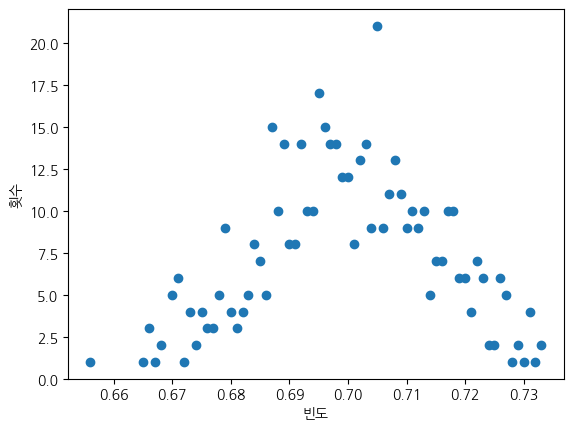

In [17]:
# 측정된 빈도 그래프 그리기
import matplotlib.font_manager as fm
from collections import defaultdict

frequency_counts = defaultdict(int)
for frequency in frequency_array:
    frequency_counts[frequency] += 1

frequencies = list(frequency_counts.keys())
counts = [frequency_counts[freq] for freq in frequencies]



font_path = "./nanum-gothic/NanumGothic.ttf"
fontprop = fm.FontProperties(fname=font_path)

plt.rc('font', family=fontprop.get_name())
plt.scatter(frequencies, counts)
plt.xlabel('빈도')
plt.ylabel('횟수')
plt.show()

### 3.2.1 히스토그램 내 유사한 점들을 묶기

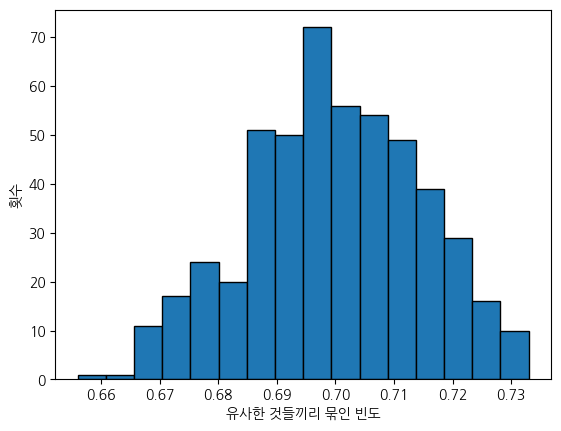

In [18]:
# plt.hist를 사용한 빈도 히스토그램 그리기
plt.hist(frequency_array, bins = 'auto', edgecolor = 'black')
plt.xlabel("유사한 것들끼리 묶인 빈도")
plt.ylabel('횟수')
plt.show()

빈의 개수: 16


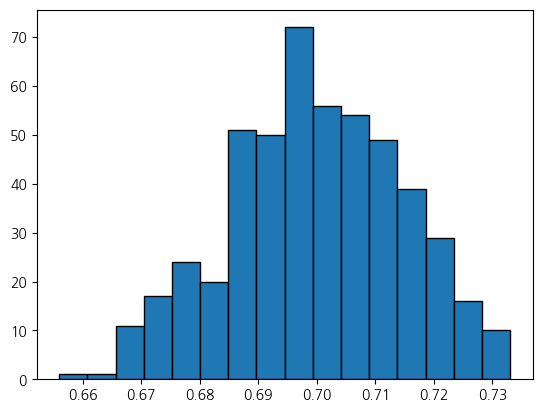

In [19]:
# 히스토그램의 빈 개수
counts, _, _ = plt.hist(frequency_array, bins='auto', edgecolor='black')
print(f"빈의 개수: {counts.size}")

빈 너비: 0.004812499999999997


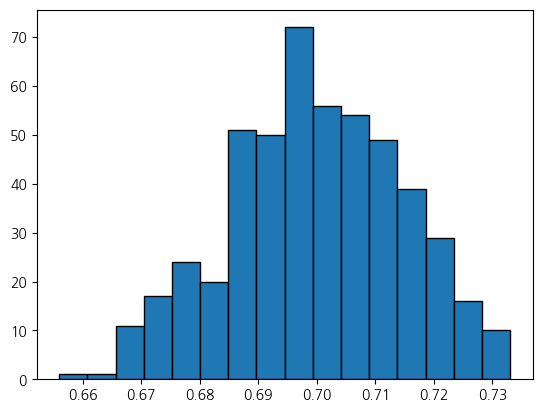

In [20]:
# 히스토그램의 빈 너비 계산하기
counts, bin_edges, _ = plt.hist(frequency_array, bins='auto', edgecolor='black')

bin_width = bin_edges[1] - bin_edges[0]
assert bin_width == (max_freq-min_freq)/counts.size
print(f"빈 너비: {bin_width}")

In [21]:
# 빈의 빈도와 크기
def output_bin_coverage(i):
    count = int(counts[i])
    range_start, range_end = bin_edges[i], bin_edges[i+1]
    range_string = f"{range_start} - {range_end}"
    print((f"빈도 범위 {range_string}에 대한 빈은 "
          f"{count}개의 요소를 포함합니다"))

output_bin_coverage(0)
output_bin_coverage(5)

빈도 범위 0.656 - 0.6608125에 대한 빈은 1개의 요소를 포함합니다
빈도 범위 0.6800625 - 0.684875에 대한 빈은 20개의 요소를 포함합니다


In [22]:
# 배열의 최댓값에 대한 인덱스 구하기
assert counts[counts.argmax()] == counts.max()

In [23]:
# 히스토그램의 가장 높은 구간을 반환하는 데 argmax 사용하기
output_bin_coverage(counts.argmax())

빈도 범위 0.6945 - 0.6993125에 대한 빈은 72개의 요소를 포함합니다


### 3.2.2 히스토그램에서 확률 구하기

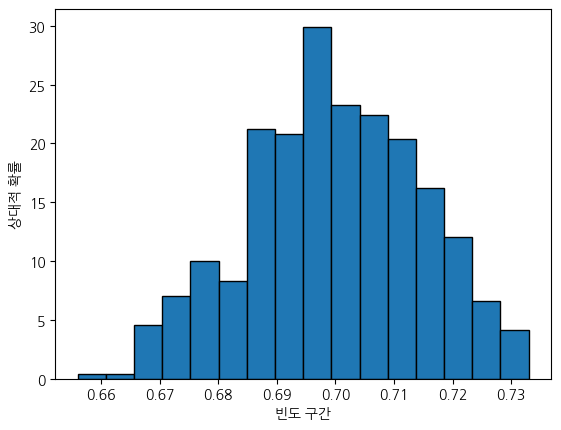

In [24]:
# 히스토그램의 상대적 확률 그리기
likelihoods, bin_edges, _ = plt.hist(frequency_array, bins = 'auto',
                                    edgecolor = 'black', density = True)
plt.xlabel("빈도 구간")
plt.ylabel("상대적 확률")
plt.show()

In [25]:
# 히스토그램의 전체 영역 계산하기
assert likelihoods.sum() * bin_width == 1.0

In [26]:
# 최고점 빈도에 대한 확률 계산하기
index = likelihoods.argmax()
area = likelihoods[index] * bin_width
range_start, range_end = bin_edges[index], bin_edges[index+1]
range_string = f"{range_start} - {range_end}"
print(f"샘플링된 빈도가 {range_string} 구간에 속할 확률은 {area}입니다")

샘플링된 빈도가 0.6945 - 0.6993125 구간에 속할 확률은 0.144입니다


In [27]:
# 빈도 범위의 확률 늘리기
peak_index = likelihoods.argmax()
start_index, end_index = (peak_index-1, peak_index+2)
area = likelihoods[start_index:end_index+1].sum() * bin_width
range_start, range_end = bin_edges[start_index], bin_edges[end_index]
range_string = f"{range_start} - {range_end}"
print(f"샘플링된 빈도가 {range_string} 구간에 속할 확률은 {area}입니다")

샘플링된 빈도가 0.6896875 - 0.704125 구간에 속할 확률은 0.464입니다


In [28]:
# 높은 신뢰 구간 계산하기
def compute_high_confidence_interval(likelihoods, bin_width):
    peak_index = likelihoods.argmax()
    area = likelihoods[peak_index] * bin_width
    start_index, end_index = peak_index, peak_index + 1
    while area < 0.95:
        if start_index > 0:
            start_index -= 1
        if end_index < likelihoods.size - 1:
            end_index += 1
        area = likelihoods[start_index:end_index+1].sum() * bin_width
        
    range_start, range_end = bin_edges[start_index], bin_edges[end_index]
    range_string = f"{range_start:.6f} - {range_end:.6f}"
    print((f"빈도 범위 {range_string}는 {100 * area:.2f}% 신뢰구간을 나타냅니다"))
    return start_index, end_index

compute_high_confidence_interval(likelihoods, bin_width)

빈도 범위 0.670438 - 0.723375는 95.40% 신뢰구간을 나타냅니다


(np.int64(3), np.int64(14))

### 3.2.3 고신뢰 구간의 범위 줄이기

In [29]:
# 빈도 10만 개 샘플링하기
np.random.seed(0)
head_count_array = np.random.binomial(1000, 0.7, 100000)
frequency_array = head_count_array / 1000
assert frequency_array.size == 100000

빈도 범위 0.670429 - 0.727857는 95.42% 신뢰구간을 나타냅니다


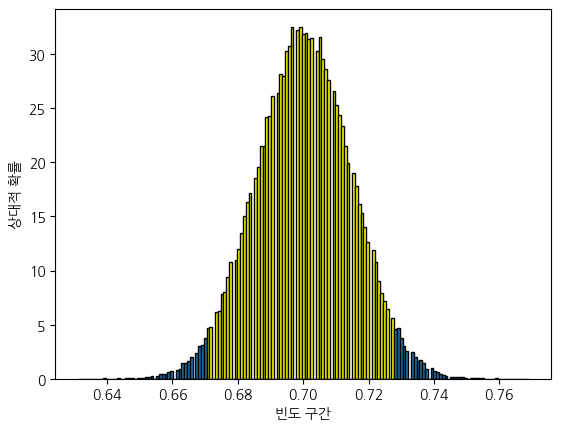

In [30]:
# 특정 구간에 대해 히스토그램 막대 색칠하기
likelihoods, bin_edges, patches = plt.hist(frequency_array, bins='auto',
                                           edgecolor = 'black', density=True)
bin_width = bin_edges[1] - bin_edges[0]
start_index, end_index = compute_high_confidence_interval(likelihoods, bin_width)
for i in range(start_index, end_index):
    patches[i].set_facecolor("yellow")
plt.xlabel("빈도 구간")
plt.ylabel("상대적 확률")
plt.show()

빈도 범위 0.695769 - 0.703708는 95.06% 신뢰구간을 나타냅니다


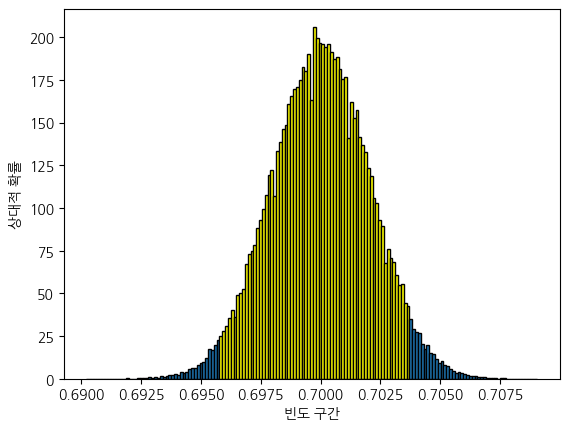

In [31]:
# 동전 뒤집기를 50억 번 샘플링하기
np.random.seed(0)
head_count_array = np.random.binomial(50000, 0.7, 100000)
frequency_array = head_count_array / 50000

likelihoods, bin_edges, patches = plt.hist(frequency_array, bins='auto',
                                           edgecolor = 'black', density = True)
bin_width = bin_edges[1] - bin_edges[0]
start_index, end_index = compute_high_confidence_interval(likelihoods, bin_width)

for i in range(start_index, end_index):
    patches[i].set_facecolor("yellow")
plt.xlabel("빈도 구간")
plt.ylabel("상대적 확률")
plt.show()

### 3.2.4 넘파이로 히스토그램 계산하기

In [32]:
# np.histogram으로 히스토그램 계산하기
np.random.seed(0)
likelihoods, bin_edges = np.histogram(frequency_array, bins = 'auto',
                                      density = True)
bin_width = bin_edges[1] - bin_edges[0]
compute_high_confidence_interval(likelihoods, bin_width)

빈도 범위 0.695769 - 0.703708는 95.06% 신뢰구간을 나타냅니다


(np.int64(47), np.int64(114))

## 3.3 신뢰 구간으로 편향된 카드 덱 분석하기

In [33]:
# 임의의 빨간색 카드 개수 생성하기
np.random.seed(0)
total_cards = 52
red_card_count = np.random.randint(0, total_cards + 1)

In [34]:
# 검은색 카드 개수 생성하기
black_card_count = total_cards - red_card_count
assert black_card_count != red_card_count

In [35]:
# 모든 결과들의 집합에서 특정 조건을 만족하는지 검사
def get_matching_event(event_condition, sample_space):
    return {outcome for outcome in sample_space 
             if event_condition(outcome)}

# 일반화된 사건 확률 함수 정의
def compute_event_probability(event_condition, generic_sample_space):
    event = get_matching_event(event_condition, generic_sample_space)
    # 함수의 타입이 set인지 확인
    if type(generic_sample_space) == type(set()):
        return len(event) / len(generic_sample_space)
    
    event_size = sum(generic_sample_space[outcome] for outcome in event)
    return event_size / sum(generic_sample_space.values())

# 표본 공간에서 카드 확률 계산하기
weighted_sample_space = {'red_card': red_card_count, 'black_card': black_card_count}
prob_red = compute_event_probability(lambda x: x == 'red_card', weighted_sample_space)

In [36]:
# 나눗셈으로 카드 확률 계산하기
assert prob_red == red_card_count / total_cards

In [37]:
# 임의의 카드 시뮬레이션하기
np.random.seed(0)
color = 'red' if np.random.binomial(1, prob_red) else 'black'
print(f"뒤섞인 카드 덱에서 꺼낸 첫 번째 카드는 {color}입니다")

뒤섞인 카드 덱에서 꺼낸 첫 번째 카드는 red입니다


In [38]:
# 임의의 카드 10번 시뮬레이션 하기
np.random.seed(0)
red_count = np.random.binomial(10, prob_red)
print(f"10번 카드를 뒤섞었을 때 {red_count}번이 빨간색입니다.")

10번 카드를 뒤섞었을 때 8번이 빨간색입니다.


In [39]:
# 카드 확률 신뢰 구간 계산하기
np.random.seed(0)
red_card_count_array = np.random.binomial(50000, prob_red, 100000)
frequency_array = red_card_count_array / 50000

likelihoods, bin_edges = np.histogram(frequency_array, bins = 'auto', density = True)
bin_width = bin_edges[1] - bin_edges[0]
start_index, end_index = compute_high_confidence_interval(likelihoods, bin_width)

빈도 범위 0.842865 - 0.849139는 95.16% 신뢰구간을 나타냅니다


In [40]:
# 빨간색 카드 개수 추정하기
range_start = round(0.842865*total_cards)
range_end = round(0.849139*total_cards)
print(f"빨간색 카드 개수는 {range_start}와 {range_end}사이입니다")

빨간색 카드 개수는 44와 44사이입니다


In [41]:
if red_card_count == 44:
    print("맞췄습니다! 카드 덱에는 44장의 빨간색 카드가 들어있습니다")
else:
    print("저런 샘플링 추정이 틀렸습니다")

맞췄습니다! 카드 덱에는 44장의 빨간색 카드가 들어있습니다


## 3.4 순열로 카드 뒤섞기

In [42]:
# 카드 덱 네 장 뒤섞기
np.random.seed(0)
card_deck = [1, 1, 0, 0]
np.random.shuffle(card_deck)
print(card_deck)

[0, 0, 1, 1]


In [43]:
# 뒤섞인 카드 덱의 복사본 반환하기
np.random.seed(0)
unshuffled_deck = [1, 1, 0, 0]
shuffled_deck = np.random.permutation(unshuffled_deck)
assert unshuffled_deck == [1, 1, 0, 0]
print(shuffled_deck)

[0 0 1 1]


In [44]:
# 카드 순열 확인하기
import itertools
for permutation in list(itertools.permutations(unshuffled_deck))[:3]:
    print(permutation)

(1, 1, 0, 0)
(1, 1, 0, 0)
(1, 0, 1, 0)


In [45]:
# 순열 교환 결과 확인하기
for permutation in list(itertools.permutations([0, 1, 2, 3]))[:3]:
    print(permutation)

(0, 1, 2, 3)
(0, 1, 3, 2)
(0, 2, 1, 3)


In [46]:
# 순열 개수 계산하기
weighted_sample_space = defaultdict(int)
for permutation in itertools.permutations(unshuffled_deck):
    weighted_sample_space[permutation] += 1

for permutation, count in weighted_sample_space.items():
    print(f"순열 {permutation}은 {count}번 발생합니다")

순열 (1, 1, 0, 0)은 4번 발생합니다
순열 (1, 0, 1, 0)은 4번 발생합니다
순열 (1, 0, 0, 1)은 4번 발생합니다
순열 (0, 1, 1, 0)은 4번 발생합니다
순열 (0, 1, 0, 1)은 4번 발생합니다
순열 (0, 0, 1, 1)은 4번 발생합니다


In [47]:
# 순열 확률 계산하기
sample_space = set(itertools.permutations(unshuffled_deck))
event_condition = lambda x: list(x) == unshuffled_deck
prob = compute_event_probability(event_condition, sample_space)
assert prob == 1 / len(sample_space)
print(f"해당 뒤섞기 작업이 카드 덱을 변경하지 않을 확률은 {prob}입니다")

해당 뒤섞기 작업이 카드 덱을 변경하지 않을 확률은 0.16666666666666666입니다


In [48]:
# 카드 표본 공간 열개 계산하기
red_cards = 5 * [1]
black_cards = 5 * [0]
unshuffled_deck = red_cards + black_cards
sample_space = set(itertools.permutations(unshuffled_deck))
print(f"카드 열 장으로 구성된 카드 덱의 표본 공간에는 {len(sample_space)}개의 요소가 있습니다")

카드 열 장으로 구성된 카드 덱의 표본 공간에는 252개의 요소가 있습니다


## 3.5 요약
- np.random.binomial 메서드로 임의 동전 뒤집기를 시뮬레이션 할 수 있음.
- 히스토그램은 관측된 수치 값 빈도를 구간으로 나누어 보여줌. 빈도는 1.0이 되도록 상대적 확률로 변환될수도 있으며 그렇게 변환된 히스토그램은 확률 분포가 됨. </br>
분포의 최고점 주변 영역은 신뢰 구간을 의미. 일반적으로 95% 이상 신뢰 구간이 선호됨.
- 중심 극한 정리에 따르면 종 모양 곡선과 관련된 95% 신뢰 구간은 각 빈도 표본의 크기가 증가할수록 더 좁아짐.
